In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
MOVIES = pd.read_csv("movies (1).csv")
MOVIES = MOVIES.reset_index()
MOVIES

,index,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
9737,9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,9739,193585,Flint (2017),Drama
9740,9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
TAGS = pd.read_csv("tags.csv")
TAGS = TAGS.reset_index()
TAGS

,index,userId,movieId,tag,timestamp
0,0,2,60756,funny,1445714994
1,1,2,60756,Highly quotable,1445714996
2,2,2,60756,will ferrell,1445714992
3,3,2,89774,Boxing story,1445715207
4,4,2,89774,MMA,1445715200
...,...,...,...,...,...
3678,3678,606,7382,for katie,1171234019
3679,3679,606,7936,austere,1173392334
3680,3680,610,3265,gun fu,1493843984
3681,3681,610,3265,heroic bloodshed,1493843978


In [6]:
RATINGS = pd.read_csv("ratings.csv")
RATINGS = RATINGS.reset_index()
RATINGS

,index,userId,movieId,rating,timestamp
0,0,1,1,4.0,964982703
1,1,1,3,4.0,964981247
2,2,1,6,4.0,964982224
3,3,1,47,5.0,964983815
4,4,1,50,5.0,964982931
...,...,...,...,...,...
100831,100831,610,166534,4.0,1493848402
100832,100832,610,168248,5.0,1493850091
100833,100833,610,168250,5.0,1494273047
100834,100834,610,168252,5.0,1493846352


In [7]:
LINKS = pd.read_csv("links.csv")
LINKS = LINKS.reset_index()
LINKS

,index,movieId,imdbId,tmdbId
0,0,1,114709,862.0
1,1,2,113497,8844.0
2,2,3,113228,15602.0
3,3,4,114885,31357.0
4,4,5,113041,11862.0
...,...,...,...,...
9737,9737,193581,5476944,432131.0
9738,9738,193583,5914996,445030.0
9739,9739,193585,6397426,479308.0
9740,9740,193587,8391976,483455.0


In [8]:
df = pd.merge(MOVIES,RATINGS,on='movieId')
df = pd.merge(df,LINKS,on='movieId')
df

,index_x,movieId,title,genres,index_y,userId,rating,timestamp,index,imdbId,tmdbId
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,4.0,964982703,0,114709,862.0
1,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,516,5,4.0,847434962,0,114709,862.0
2,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,874,7,4.5,1106635946,0,114709,862.0
3,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1434,15,2.5,1510577970,0,114709,862.0
4,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1667,17,4.5,1305696483,0,114709,862.0
...,...,...,...,...,...,...,...,...,...,...,...
100831,9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,27256,184,4.0,1537109082,9737,5476944,432131.0
100832,9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,27257,184,3.5,1537109545,9738,5914996,445030.0
100833,9739,193585,Flint (2017),Drama,27258,184,3.5,1537109805,9739,6397426,479308.0
100834,9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,27259,184,3.5,1537110021,9740,8391976,483455.0


In [9]:
TITLE_vs_RATING = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
TITLE_vs_RATING_COUNT = pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False))


In [10]:
TITLE_vs_RATING_COUNT #FREQUENCY OF USER VOTED


,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
King Solomon's Mines (1950),1
King Solomon's Mines (1937),1
King Ralph (1991),1


In [11]:
TITLE_vs_RATING # MEAN RATING


,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


<AxesSubplot:>

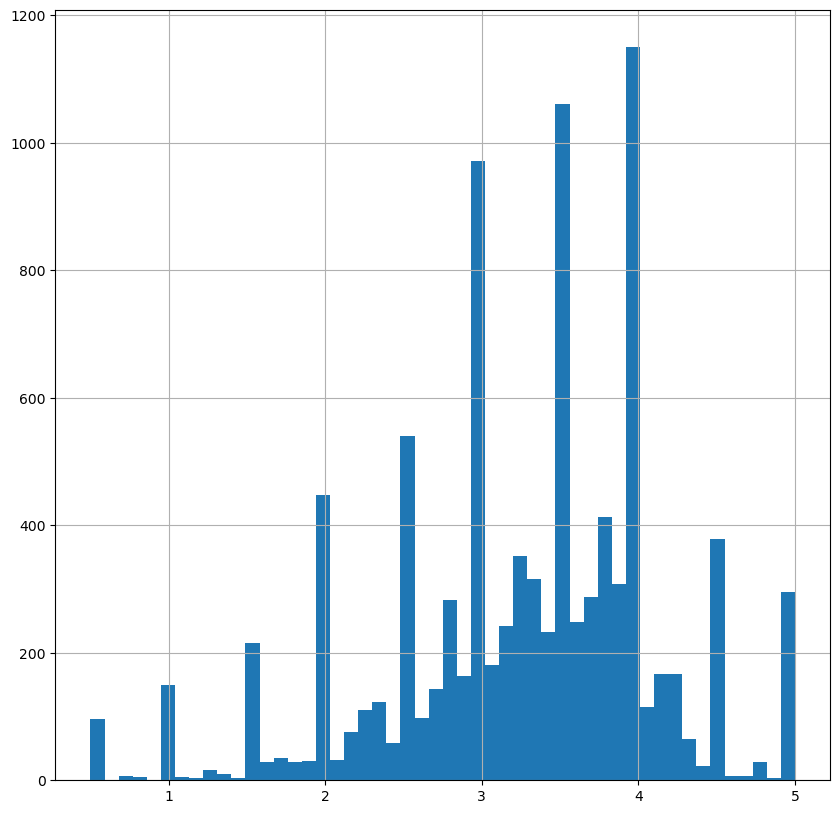

In [12]:
plt.figure(figsize=(10,10))
TITLE_vs_RATING['rating'].hist(bins=50)

<AxesSubplot:>

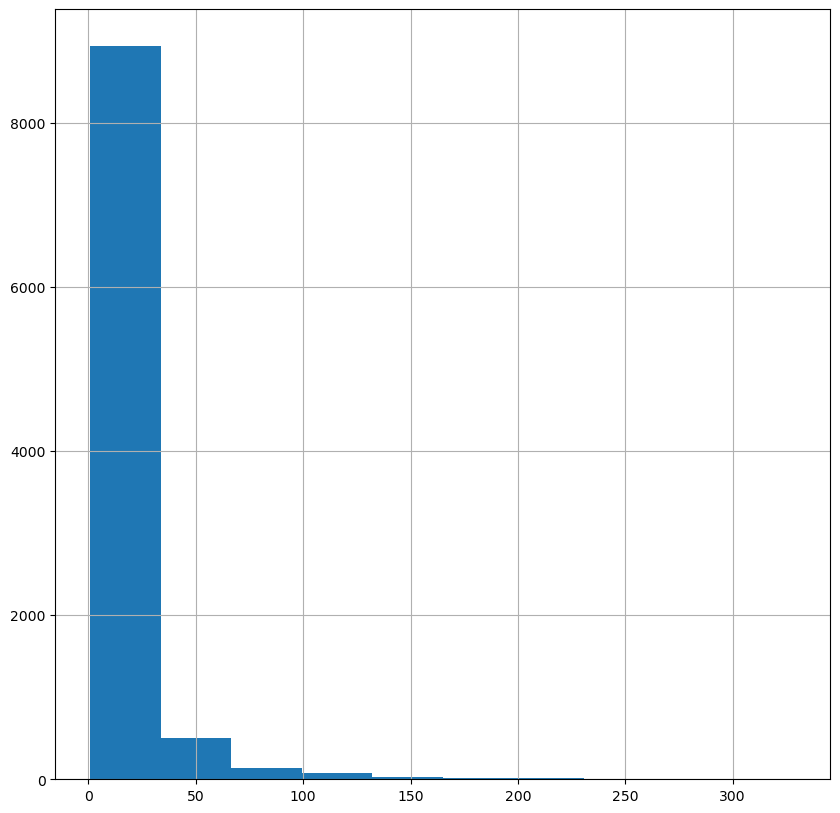

In [13]:
plt.figure(figsize=(10,10))
TITLE_vs_RATING_COUNT['rating'].hist()

In [14]:
USER_VS_RATING = df.pivot_table(index='userId',columns='title',values='rating') 
# If as user haven't have watched the novies before than he has not idea about the film so 0 is assumed as a default value
USER_VS_RATING.fillna(0,inplace=True) 
USER_VS_RATING

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [15]:
def Genralize(row) :
    new_row = (row-row.mean())/(row.max()-row.mean())
    return new_row

USER_VS_RATING = USER_VS_RATING.apply(Genralize)
USER_VS_RATING

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,0.794509,-0.001642
2,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
3,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
4,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
5,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
607,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,-0.028668,-0.028018,-0.006601,-0.027455,-0.001642
608,-0.001642,-0.001642,-0.003289,-0.001642,-0.00263,-0.001642,-0.018024,-0.001642,-0.053177,-0.009516,...,-0.001642,-0.010771,-0.004023,-0.003289,-0.001642,0.897133,0.871498,-0.006601,-0.027455,-0.001642


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
item_similarity = cosine_similarity(USER_VS_RATING.T)
item_similarity

array([[ 1.        , -0.00164204, -0.0023241 , ...,  0.32528734,
        -0.00818543, -0.00164204],
       [-0.00164204,  1.        ,  0.706526  , ..., -0.00359434,
        -0.00818543, -0.00164204],
       [-0.0023241 ,  0.706526  ,  1.        , ..., -0.00508734,
        -0.01158546, -0.0023241 ],
       ...,
       [ 0.32528734, -0.00359434, -0.00508734, ...,  1.        ,
        -0.0179175 , -0.00359434],
       [-0.00818543, -0.00818543, -0.01158546, ..., -0.0179175 ,
         1.        , -0.00818543],
       [-0.00164204, -0.00164204, -0.0023241 , ..., -0.00359434,
        -0.00818543,  1.        ]])

In [18]:
item_similarity_df = pd.DataFrame(item_similarity,index=USER_VS_RATING.columns,columns=USER_VS_RATING.columns)
item_similarity_df

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,-0.001642,-0.002324,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,0.135943,-0.004325,...,-0.001642,0.339935,0.542247,0.706526,-0.001642,-0.007675,0.134327,0.325287,-0.008185,-0.001642
'Hellboy': The Seeds of Creation (2004),-0.001642,1.000000,0.706526,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Round Midnight (1986),-0.002324,0.706526,1.000000,-0.002324,-0.003191,-0.002324,0.170199,-0.002324,-0.014958,-0.006121,...,-0.002324,-0.006495,-0.003975,-0.003289,-0.002324,-0.010863,-0.010961,-0.005087,-0.011585,-0.002324
'Salem's Lot (2004),-0.001642,-0.001642,-0.002324,1.000000,0.857269,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Til There Was You (1997),-0.002254,-0.002254,-0.003191,0.857269,1.000000,-0.002254,-0.008797,-0.002254,-0.014510,-0.005938,...,-0.002254,-0.006301,-0.003856,-0.003191,-0.002254,-0.010538,-0.010632,-0.004935,-0.011238,-0.002254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),-0.007675,-0.007675,-0.010863,-0.007675,-0.010538,-0.007675,0.187953,0.212646,0.053614,0.115396,...,-0.007675,-0.021449,-0.013126,-0.010863,-0.007675,1.000000,0.163022,-0.016800,0.138611,-0.007675
xXx (2002),0.134327,-0.007744,-0.010961,-0.007744,-0.010632,-0.007744,0.062174,-0.007744,0.241092,-0.000060,...,0.063291,0.291410,0.163464,0.240394,-0.007744,0.163022,1.000000,0.259049,0.065673,-0.007744
xXx: State of the Union (2005),0.325287,-0.003594,-0.005087,-0.003594,-0.004935,-0.003594,-0.014025,-0.003594,0.139511,-0.009467,...,-0.003594,0.376455,0.172818,0.227658,-0.003594,-0.016800,0.259049,1.000000,-0.017917,-0.003594


In [19]:
def recommend(movie_name,user_rating) :
    score = item_similarity_df[movie_name]*(user_rating-2.5)
    score = score.sort_values(ascending=False)
    return score

In [20]:
recommend('Toy Story (1995)',4.5)

title
Toy Story (1995)                              2.000000
Toy Story 2 (1999)                            0.923522
Groundhog Day (1993)                          0.723079
Independence Day (a.k.a. ID4) (1996)          0.716947
Willy Wonka & the Chocolate Factory (1971)    0.714627
                                                ...   
Incendies (2010)                             -0.128894
Hunt, The (Jagten) (2012)                    -0.134003
Intouchables (2011)                          -0.148468
Wild Tales (2014)                            -0.158178
Man from Earth, The (2007)                   -0.162155
Name: Toy Story (1995), Length: 9719, dtype: float64

In [21]:
recommend('Andrew Dice Clay: Dice Rules (1991)',1)

title
Forrest Gump (1994)                          0.063105
Matrix, The (1999)                           0.053055
Star Wars: Episode IV - A New Hope (1977)    0.049091
Jurassic Park (1993)                         0.046676
Braveheart (1995)                            0.046326
                                               ...   
Prometheus (2012)                           -0.415888
Deadpool 2 (2018)                           -0.423781
Coco (2017)                                 -0.434898
Isle of Dogs (2018)                         -0.727013
Andrew Dice Clay: Dice Rules (1991)         -1.500000
Name: Andrew Dice Clay: Dice Rules (1991), Length: 9719, dtype: float64